![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 2 - Clasificación de género de películas

El propósito de este proyecto es que puedan poner en práctica, en sus respectivos grupos de trabajo, sus conocimientos sobre técnicas de preprocesamiento, modelos predictivos de NLP, y la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 2: Clasificación de género de películas"

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 8. Sin embargo, es importante que avancen en la semana 7 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 8, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/2c54d005f76747fe83f77fbf8b3ec232).

## Datos para la predicción de género en películas

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/moviegenre.png)

En este proyecto se usará un conjunto de datos de géneros de películas. Cada observación contiene el título de una película, su año de lanzamiento, la sinopsis o plot de la película (resumen de la trama) y los géneros a los que pertenece (una película puede pertenercer a más de un género). Por ejemplo:
- Título: 'How to Be a Serial Killer'
- Plot: 'A serial killer decides to teach the secrets of his satisfying career to a video store clerk.'
- Generos: 'Comedy', 'Crime', 'Horror'

La idea es que usen estos datos para predecir la probabilidad de que una película pertenezca, dada la sinopsis, a cada uno de los géneros.

Agradecemos al profesor Fabio González, Ph.D. y a su alumno John Arevalo por proporcionar este conjunto de datos. Ver https://arxiv.org/abs/1702.01992

## Ejemplo predicción conjunto de test para envío a Kaggle
En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Importación librerías
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [43]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [44]:
# Visualización datos de entrenamiento
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [45]:
# Visualización datos de test
dataTesting.head()
dataTesting.loc[1,"plot"]

"who meets by fate ,  shall be sealed by fate .  theresa osborne is running along the beach when she stumbles upon a bottle washed up on the shore .  inside is a message ,  reading the letter she feels so moved and yet she felt as if she has violated someone ' s thoughts .  in love with a man she has never met ,  theresa tracks down the author of the letter to a small town in wilmington ,  two lovers with crossed paths .  but yet one can ' t let go of their past ."

In [46]:
# Definición de variables predictoras (X)
vect = CountVectorizer(max_features=1000)
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 1000)

In [47]:
# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [48]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

In [49]:
# Definición y entrenamiento
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                     random_state=42))

In [50]:
# Predicción del modelo de clasificación
y_pred_genres = clf.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.7812262183677007

In [51]:
# transformación variables predictoras X del conjunto de test
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = clf.predict_proba(X_test_dtm)

In [52]:
# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_RF.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.143030,0.101960,0.024454,0.029938,0.354552,0.138830,0.030787,0.490140,0.073159,0.101339,...,0.025069,0.063208,0.000000,0.362818,0.056648,0.008970,0.017522,0.202605,0.033989,0.018117
4,0.122624,0.085786,0.024213,0.084795,0.370949,0.216657,0.080359,0.515684,0.062976,0.067019,...,0.024734,0.060935,0.000477,0.149703,0.058190,0.014248,0.020099,0.204794,0.030438,0.018506
5,0.151364,0.110284,0.013762,0.075334,0.304837,0.448736,0.021010,0.611544,0.081741,0.169121,...,0.044538,0.261372,0.000000,0.335987,0.128505,0.001016,0.048658,0.423242,0.052693,0.025351
6,0.154448,0.125772,0.020991,0.064124,0.340779,0.140892,0.009133,0.632038,0.068287,0.063631,...,0.131074,0.088418,0.000000,0.197224,0.132208,0.001432,0.039743,0.269385,0.077607,0.017862
7,0.175143,0.210069,0.035476,0.032505,0.313850,0.243150,0.021793,0.427885,0.079781,0.143879,...,0.023859,0.090359,0.000048,0.205117,0.241663,0.002634,0.018403,0.259465,0.021569,0.017585


# **Solución**

## **Análisis Exploratorio de Datos**

### Estadísiticas descriptivas

In [6]:
# Descripción estadística de los datos numéricos
print(dataTraining.describe())

# Descripción de datos categóricos
print(dataTraining.describe(include=['O']))

              year       rating
count  7895.000000  7895.000000
mean   1989.726409     6.402812
std      22.660717     1.078260
min    1894.000000     1.200000
25%    1980.000000     5.800000
50%    1997.000000     6.500000
75%    2007.000000     7.200000
max    2015.000000     9.300000
                      title  \
count                  7895   
unique                 7729   
top     Alice in Wonderland   
freq                      3   

                                                     plot     genres  
count                                                7895       7895  
unique                                               7894       1336  
top     an evil genius in a flying fortress is trying ...  ['Drama']  
freq                                                    2        429  


### Datos faltantes

In [4]:
# Número de datos faltantes por columna
missing_data = dataTraining.isnull().sum()
print("Datos faltantes por columna:\n", missing_data)

# Porcentaje de datos faltantes por columna
missing_percentage = (dataTraining.isnull().sum() / len(dataTraining)) * 100
print("Porcentaje de datos faltantes por columna:\n", missing_percentage)

Datos faltantes por columna:
 year      0
title     0
plot      0
genres    0
rating    0
dtype: int64
Porcentaje de datos faltantes por columna:
 year      0.0
title     0.0
plot      0.0
genres    0.0
rating    0.0
dtype: float64


### Datos duplicados

In [5]:
# Convertir la columna genres a strings 
dataTraining['genres_str'] = dataTraining['genres'].apply(lambda x: str(x))
columns_to_check = dataTraining.columns.difference(['genres'])
duplicates = dataTraining.duplicated(subset=columns_to_check)

# Tamaño del dataframe antes de la identificación de duplicados
print("Número de registros antes del análisis:", dataTraining.shape)

# Identificar y contar duplicados
print("Número de registros duplicados:", duplicates.sum())

# Eliminar duplicados
dataTraining = dataTraining.drop_duplicates(subset=columns_to_check)

# Tamaño del dataframe después de la eliminación de duplicados
print("Número de registros después del análisis:", dataTraining.shape)

# Eliminar la columna genres_str
dataTraining.drop('genres_str', axis=1, inplace=True)

Número de registros antes del análisis: (7895, 6)
Número de registros duplicados: 1
Número de registros después del análisis: (7894, 6)


### Distribuciones y correlaciones

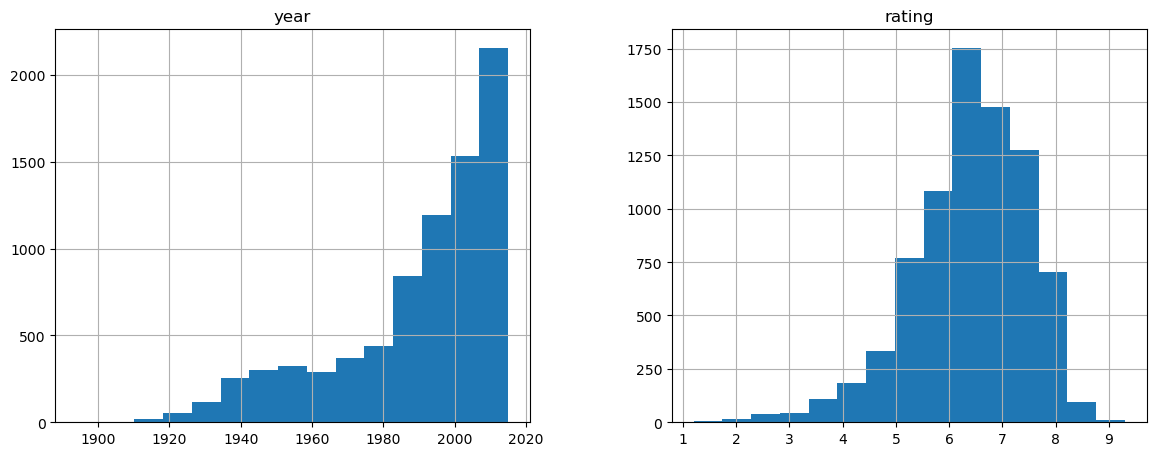

In [6]:
import matplotlib.pyplot as plt

dataTraining.hist(bins=15, figsize=(30, 25), layout=(4, 4))
plt.show()

In [6]:
# Número de registros únicos por genre
genres_combination_unique = dataTraining['genres'].unique()
print("Número de combinaciones únicas de la columna genre:", len(genres_combination_unique))

Número de combinaciones únicas de la columna genre: 1336


In [7]:
# Número de géneros únicos
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])
genres_df = pd.DataFrame(data=y_genres, columns = le.classes_)
print("Número géneros únicos:", len(genres_df.columns.tolist()))
genres_df.sum()

Número géneros únicos: 24


Action         1302
Adventure      1023
Animation       259
Biography       373
Comedy         3046
Crime          1447
Documentary     419
Drama          3965
Family          681
Fantasy         706
Film-Noir       168
History         273
Horror          954
Music           341
Musical         271
Mystery         759
News              7
Romance        1892
Sci-Fi          723
Short            92
Sport           261
Thriller       2024
War             348
Western         237
dtype: int64

In [8]:
# Concatenamos el df de las variables binarias con el df inicial
dataTraining = dataTraining.reset_index(drop=True)
genres_df = genres_df.reset_index(drop=True)
dataTraining_correlation = pd.concat([dataTraining, genres_df], axis=1)
dataTraining_correlation

,year,title,plot,genres,rating,Action,Adventure,Animation,Biography,Comedy,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,2003,Most,most is the story of a single father who takes...,"[Short, Drama]",8.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"[Comedy, Crime, Horror]",5.6,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","[Drama, Film-Noir, Thriller]",7.2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1954,Executive Suite,"in a friday afternoon in new york , the presi...",[Drama],7.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","[Action, Crime, Thriller]",6.6,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,2010,Our Family Wedding,""" our marriage , their wedding . "" it ' s l...","[Comedy, Romance]",4.9,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7890,1984,Conan the Destroyer,"the wandering barbarian , conan , alongside ...","[Action, Adventure, Fantasy]",5.8,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7891,1955,Kismet,"like a tale spun by scheherazade , kismet fol...","[Adventure, Musical, Fantasy, Comedy, Romance]",6.4,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,0
7892,1982,The Secret of NIMH,"mrs . brisby , a widowed mouse , lives in a...","[Animation, Adventure, Drama, Family, Fantasy,...",7.6,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


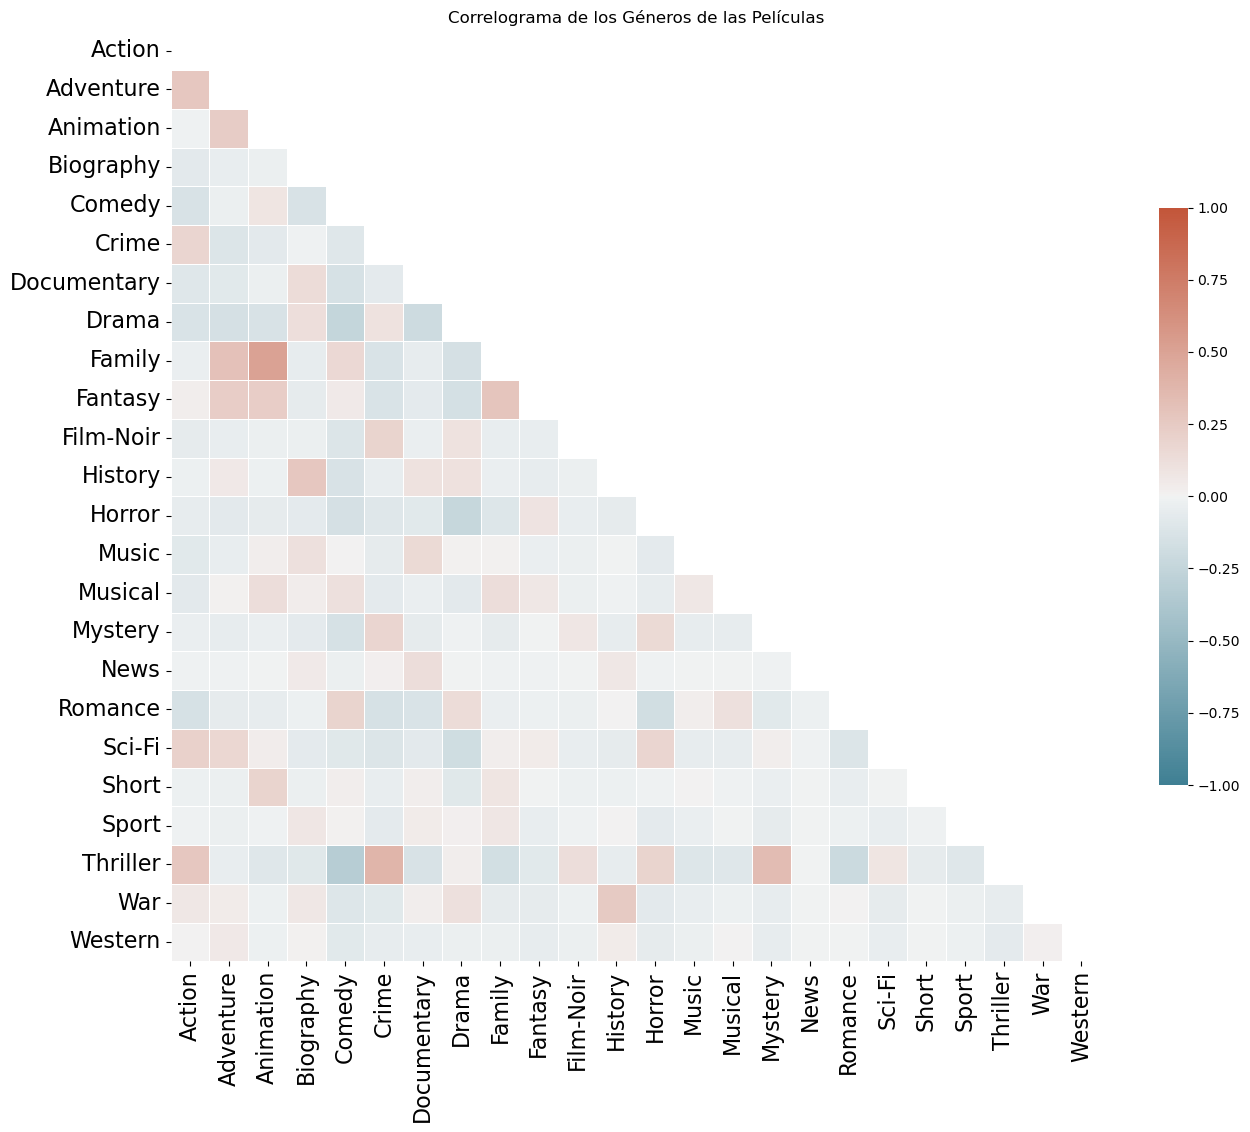

In [11]:
#Correlograma
import seaborn as sns

# Columnas de interés
columns = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']
columns = dataTraining_correlation[columns]

# Cálculo de la matriz de correlación
correlation_matrix = columns.corr()

# Correlograma
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(15, 15))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, annot=False, fmt='.2f', linewidths=.5,
            cbar_kws={"shrink": .5})

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('Correlograma de los Géneros de las Películas')
plt.show()

## **Preprocesamiento**

### Limpieza de la columna **plot** en los datos entrenamiento y prueba

### Aplicación en los datos de entrenamiento

In [9]:
import re

# Función para limpiar texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres que no sean letras o espacios
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    # Eliminar espacios extra
    text = re.sub(r"\s+", " ", text).strip()
    # Eliminar backslash
    text = re.sub("\'", "", text)
    return text

# Aplicar la función de limpieza
dataTraining['plot_clean'] = dataTraining['plot'].apply(clean_text)

# Mostrar las primeras filas para verificar los resultados
print(dataTraining[['plot']].head())
print(dataTraining[['plot_clean']].head())

                                                plot
0  most is the story of a single father who takes...
1  a serial killer decides to teach the secrets o...
2  in sweden ,  a female blackmailer with a disfi...
3  in a friday afternoon in new york ,  the presi...
4  in los angeles ,  the editor of a publishing h...
                                          plot_clean
0  most is the story of a single father who takes...
1  a serial killer decides to teach the secrets o...
2  in sweden a female blackmailer with a disfigur...
3  in a friday afternoon in new york the presiden...
4  in los angeles the editor of a publishing hous...


In [10]:
# Eliminación de stopwords
import nltk
from nltk.corpus import stopwords

# Definición de función para eliminar stopwords
def remove_stopwords(text):
    # Obtener stopwords
    stop_words = set(stopwords.words('english')) 
    # Tokenizar el texto en palabras
    words = nltk.word_tokenize(text)
    # Filtrar y unir palabras
    text_filtered = " ".join([word for word in text.split() if word not in stop_words])
    return text_filtered

dataTraining['plot_clean'] = dataTraining['plot_clean'].apply(remove_stopwords)

# Mostrar las primeras filas para verificar los resultados
print(dataTraining[['plot']].head())
print(dataTraining[['plot_clean']].head())

                                                plot
0  most is the story of a single father who takes...
1  a serial killer decides to teach the secrets o...
2  in sweden ,  a female blackmailer with a disfi...
3  in a friday afternoon in new york ,  the presi...
4  in los angeles ,  the editor of a publishing h...
                                          plot_clean
0  story single father takes eight year old son w...
1  serial killer decides teach secrets satisfying...
2  sweden female blackmailer disfiguring facial s...
3  friday afternoon new york president tredway co...
4  los angeles editor publishing house carol hunn...


### Aplicación en los datos de prueba

In [11]:
# Aplicar la función de limpieza
dataTesting['plot_clean'] = dataTesting['plot'].apply(clean_text)

# Mostrar las primeras filas para verificar los resultados
print(dataTesting[['plot']].head())
print(dataTesting[['plot_clean']].head())

                                                plot
1  who meets by fate ,  shall be sealed by fate ....
4  the true story of billy hayes ,  an american c...
5  martin vail left the chicago da ' s office to ...
6  husband and wife americans dr .  eugene and mr...
7  the coroner and scientist dr .  warren chapin ...
                                          plot_clean
1  who meets by fate shall be sealed by fate ther...
4  the true story of billy hayes an american coll...
5  martin vail left the chicago da s office to be...
6  husband and wife americans dr eugene and mrs h...
7  the coroner and scientist dr warren chapin is ...


In [12]:
# Eliminación de stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

dataTesting['plot_clean'] = dataTesting['plot_clean'].apply(remove_stopwords)

In [16]:
# Mostrar las primeras filas para verificar los resultados
print(dataTesting[['plot']].head())
print(dataTesting[['plot_clean']].head())

                                                plot
1  who meets by fate ,  shall be sealed by fate ....
4  the true story of billy hayes ,  an american c...
5  martin vail left the chicago da ' s office to ...
6  husband and wife americans dr .  eugene and mr...
7  the coroner and scientist dr .  warren chapin ...
                                          plot_clean
1  meets fate shall sealed fate theresa osborne r...
4  true story billy hayes american college studen...
5  martin vail left chicago da office become succ...
6  husband wife americans dr eugene mrs helen fer...
7  coroner scientist dr warren chapin researching...


## **Entrenamiento de los modelos y predicción en los datos de prueba**

### Count Vectorizer + Random Forest

In [20]:
# Definición de variables predictoras (X)
vect = CountVectorizer(max_features=1000)
X = vect.fit_transform(dataTraining['plot_clean'])
X.shape

(7894, 1000)

In [21]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X, y_genres, test_size=0.33, random_state=43)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import numpy as np

# Definir los parámetros para GridSearchCV
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [5, 10, 20, None]
}

# Crear el clasificador y el objeto GridSearchCV
clf = OneVsRestClassifier(RandomForestClassifier(random_state=43))
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc_ovr', verbose=1)

# Entrenar el clasificador con GridSearchCV
grid_search.fit(X_train, y_train_genres)

# Obtener los mejores parámetros y el mejor resultado
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores parámetros encontrados: ", best_params)
print(f"Mejor puntuación encontrada: {best_score:.2f}")

# Entrenar el clasificador con los mejores parámetros
best_clf = OneVsRestClassifier(RandomForestClassifier(
    n_estimators=best_params['estimator__n_estimators'],
    max_depth=best_params['estimator__max_depth'],
    random_state=42
))

best_clf.fit(X_train, y_train_genres)

# Predicción del modelo de clasificación
y_pred_test_genres = best_clf.predict_proba(X_test)

# Calculamos el AUC usando las probabilidades directamente
roc_auc = roc_auc_score(y_test_genres, y_pred_test_genres, average='macro')
print("ROC AUC Score:", roc_auc)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores parámetros encontrados:  {'estimator__max_depth': 5, 'estimator__n_estimators': 100}
Mejor puntuación encontrada: nan
ROC AUC Score: 0.7774084598241385


In [23]:
# transformación variables predictoras X del conjunto de test
X_new = vect.transform(dataTesting['plot_clean'])

# Predicción del conjunto de test
y_pred_new_genres = best_clf.predict_proba(X_new)

In [24]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_new_genres, index=dataTesting.index, columns=cols)
res.to_csv('prediccion1.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.137475,0.112405,0.028311,0.060584,0.376165,0.158704,0.049469,0.506597,0.072398,0.091215,...,0.031638,0.078233,0.000028,0.302593,0.069534,0.009250,0.033827,0.221646,0.028564,0.023773
4,0.142446,0.104892,0.025460,0.069845,0.367287,0.188276,0.050065,0.517547,0.070358,0.072563,...,0.030437,0.073164,0.000103,0.206092,0.069931,0.009654,0.024298,0.227598,0.038221,0.024609
5,0.167495,0.112678,0.026383,0.074070,0.349862,0.372904,0.042965,0.559015,0.114890,0.106991,...,0.040882,0.187264,0.001170,0.339203,0.106314,0.012800,0.031013,0.370716,0.055393,0.033524
6,0.154929,0.114679,0.028761,0.043113,0.371385,0.166808,0.042342,0.527886,0.071305,0.080495,...,0.061591,0.095632,0.000550,0.247694,0.121437,0.010183,0.031093,0.256418,0.047586,0.023328
7,0.177859,0.178177,0.036080,0.043118,0.379712,0.194480,0.046026,0.424539,0.099455,0.140341,...,0.030810,0.077221,0.000060,0.215331,0.208916,0.009773,0.023316,0.237246,0.028090,0.024099


### Count Vectorizer + XGBoost

In [27]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

# Parámetros de la grilla
param_grid = {
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [10, 20, 30],
    'estimator__subsample': [0.8, 1.0],
    'estimator__colsample_bytree': [0.8, 1.0],
    'estimator__gamma': [0, 0.1, 0.2]
}

# Clasificador y objeto GridSearchCV
num_classes = len(np.unique(y_train_genres))
clf = OneVsRestClassifier(XGBClassifier(objective='multi:softmax', num_class=num_classes, random_state=43, n_jobs=-1))
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)

# Entrenamiento del clasificador con gridsearch
grid_search.fit(X_train, y_train_genres)

# Mejores parámetros y puntuación
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación encontrada:", grid_search.best_score_)

# Entrenar con los mejores parámetros
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train_genres)

# Predicción y evaluación
y_pred_proba = best_clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test_genres, y_pred_proba, average='macro')
print("ROC AUC Score:", roc_auc)

Mejores parámetros encontrados: {'estimator__colsample_bytree': 1.0, 'estimator__gamma': 0.2, 'estimator__learning_rate': 0.1, 'estimator__max_depth': 20, 'estimator__n_estimators': 300, 'estimator__subsample': 0.8}
Mejor puntuación encontrada: 0.10571095925444378
ROC AUC Score: 0.8077279882975933


In [28]:
# transformación variables predictoras X del conjunto de test
X_new = vect.transform(dataTesting['plot_clean'])

# Predicción del conjunto de test
y_pred_new_genres = best_clf.predict_proba(X_new)

In [29]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_new_genres, index=dataTesting.index, columns=cols)
res.to_csv('prediccion2.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.021375,0.033842,0.001083,0.005265,0.242736,0.020855,0.002719,0.513959,0.003312,0.022812,...,0.002266,0.005789,0.000028,0.953483,0.006303,0.000451,0.007585,0.024004,0.000734,0.000564
4,0.132041,0.002797,0.003534,0.657963,0.048431,0.111051,0.151118,0.974468,0.001291,0.000955,...,0.001521,0.005026,0.000063,0.025617,0.004647,0.001017,0.006193,0.131479,0.015923,0.004495
5,0.006163,0.000209,0.000240,0.006397,0.012195,0.235079,0.000760,0.941983,0.000746,0.002207,...,0.000251,0.227017,0.014627,0.036397,0.001410,0.000388,0.005101,0.274126,0.001163,0.001549
6,0.019805,0.041759,0.000377,0.001896,0.054137,0.009440,0.000838,0.936447,0.001004,0.005487,...,0.001437,0.076973,0.000089,0.054255,0.016647,0.000391,0.001789,0.139504,0.015134,0.000571
7,0.008415,0.278968,0.000900,0.000792,0.161256,0.043307,0.002479,0.022683,0.005894,0.099691,...,0.001886,0.008027,0.000020,0.015647,0.833752,0.007364,0.000881,0.318218,0.001128,0.001154


### Count Vectorizer + Logistic Regression con penalización

In [30]:
from sklearn.linear_model import LogisticRegression

# Parámetros de la grilla
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10, 100],  
    'estimator__penalty': ['l1', 'l2'],  
    'estimator__solver': ['liblinear']  
}

# Creación del modelo de regresión logística
logreg_ovr = OneVsRestClassifier(LogisticRegression())

# Creación del objeto GridSearchCV
grid = GridSearchCV(estimator=logreg_ovr, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenamiento del clasificador
grid.fit(X_train, y_train_genres)

# Mejores parámetros y puntuación
print("Mejores parámetros encontrados:", grid.best_params_)
print("Mejor puntuación encontrada:", grid.best_score_)

# Entrenar con los mejores parámetros
best_clf = grid.best_estimator_
best_clf.fit(X_train, y_train_genres)

# Predicción y evaluación
y_pred_proba = best_clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test_genres, y_pred_proba, average='macro')
print("ROC AUC Score:", roc_auc)

Mejores parámetros encontrados: {'estimator__C': 0.1, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear'}
Mejor puntuación encontrada: 0.09380044460103047
ROC AUC Score: 0.8200943467179785


In [31]:
# transformación variables predictoras X del conjunto de test
X_new = vect.transform(dataTesting['plot_clean'])

# Predicción del conjunto de test
y_pred_new_genres = best_clf.predict_proba(X_new)

In [32]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_new_genres, index=dataTesting.index, columns=cols)
res.to_csv('prediccion3.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.137222,0.114231,0.030513,0.043140,0.324800,0.158535,0.025816,0.625338,0.053506,0.102612,...,0.036886,0.085169,0.004081,0.698188,0.053288,0.009995,0.055995,0.049183,0.023469,0.018900
4,0.074016,0.021268,0.029077,0.196897,0.197820,0.356510,0.136005,0.814583,0.025047,0.012867,...,0.026324,0.056122,0.027023,0.126043,0.025088,0.032752,0.058632,0.233522,0.052916,0.028923
5,0.003030,0.000489,0.000051,0.010089,0.004382,0.981326,0.002687,0.977125,0.000448,0.001637,...,0.000302,0.232855,0.000061,0.047600,0.000107,0.000102,0.000823,0.600552,0.000442,0.000091
6,0.018231,0.122844,0.002763,0.019038,0.163680,0.007168,0.001630,0.848809,0.027444,0.014441,...,0.008140,0.063122,0.000604,0.050655,0.195862,0.001519,0.011649,0.078103,0.120171,0.005743
7,0.012858,0.054428,0.000478,0.001899,0.046533,0.042801,0.000831,0.273199,0.001304,0.280262,...,0.000877,0.065318,0.001310,0.088482,0.668942,0.000834,0.000618,0.573184,0.001373,0.005337


### TfidVectorizer + Lemmatizer + Logistic Regression con penalización

In [13]:
# Lematización
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

wordnet_lemmatizer = WordNetLemmatizer()

def lem(text):
    words = text.split()
    return " ".join([wordnet_lemmatizer.lemmatize(word) for word in words])

dataTraining['plot_clean_lemmatized'] = dataTraining['plot_clean'].apply(lambda x: lem(x))
dataTesting['plot_clean_lemmatized'] = dataTesting['plot_clean'].apply(lambda x: lem(x))

In [14]:
# Definición de variables predictoras (X)
vect = TfidfVectorizer(max_df=0.2, sublinear_tf=True, smooth_idf=True, max_features=20000)
X = vect.fit_transform(dataTraining['plot_clean_lemmatized'])
X.shape

(7894, 20000)

In [20]:
vect

TfidfVectorizer(max_df=0.2, max_features=20, sublinear_tf=True)

In [15]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X, y_genres, test_size=0.33, random_state=43)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Parámetros de la grilla
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10, 100],  
    'estimator__penalty': ['l1', 'l2'],  
    'estimator__solver': ['liblinear']  
}

# Creación del modelo de regresión logística
logreg_ovr = OneVsRestClassifier(LogisticRegression())

# Creación del objeto GridSearchCV
grid = GridSearchCV(estimator=logreg_ovr, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenamiento del clasificador
grid.fit(X_train, y_train_genres)

# Mejores parámetros y puntuación
print("Mejores parámetros encontrados:", grid.best_params_)
print("Mejor puntuación encontrada:", grid.best_score_)

# Entrenar con los mejores parámetros
best_clf = grid.best_estimator_
best_clf.fit(X_train, y_train_genres)

# Predicción y evaluación
y_pred_proba = best_clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test_genres, y_pred_proba, average='macro')
print("ROC AUC Score:", roc_auc)

Mejores parámetros encontrados: {'estimator__C': 10, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear'}
Mejor puntuación encontrada: 0.12216566843064422
ROC AUC Score: 0.8840405616333401


In [33]:
# transformación variables predictoras X del conjunto de test
X_new = vect.transform(dataTesting['plot_clean_lemmatized'])

# Predicción del conjunto de test
y_pred_new_genres = best_clf.predict_proba(X_train)
y_pred_new_genres[0]

array([4.29965446e-02, 7.31423861e-01, 1.04119598e-02, 7.06832348e-03,
       9.16765977e-01, 5.92460731e-02, 1.63553335e-02, 9.52803723e-02,
       3.08933454e-02, 1.13572864e-02, 2.56030714e-03, 1.21697800e-02,
       1.38822985e-02, 1.16866788e-02, 1.55872790e-02, 9.57215034e-03,
       5.97567869e-04, 5.73308667e-02, 1.75494440e-02, 7.96525889e-03,
       1.07671610e-02, 1.76304014e-02, 5.27738638e-03, 1.39974704e-02])

In [34]:
X_new = vect.transform(dataTesting['plot_clean_lemmatized'])

# Predicción del conjunto de test
y_pred_new_genres = best_clf.predict_proba(X_new)
y_pred_new_genres[0]

array([8.76474629e-02, 2.24328059e-02, 1.10248439e-02, 1.88111926e-02,
       2.99166628e-01, 8.27650887e-02, 1.12734652e-02, 7.46665476e-01,
       2.57622353e-02, 4.54312835e-02, 8.26373469e-03, 6.82666105e-03,
       1.92397927e-02, 7.08864889e-03, 2.52665392e-02, 5.59679510e-02,
       4.41933284e-04, 8.41324870e-01, 1.40953633e-02, 5.13251204e-03,
       8.87877907e-03, 5.87908466e-02, 9.16879704e-03, 3.83475063e-03])

In [40]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_new_genres, index=dataTesting.index, columns=cols)
res.to_csv('prediccion4.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
0,0.039295,0.132367,0.023753,0.019059,0.322886,0.419921,0.035285,0.44318,0.069909,0.053378,...,0.011619,0.047648,0.001069,0.044995,0.010628,0.005364,0.00366,0.456566,0.022191,0.015625


In [26]:
# Guardar el modelo entrenado
import joblib
joblib.dump((best_clf,vect), 'lr_l2_hugo.joblib')

['lr_l2_hugo.joblib']